# 1: Pandas/Geopandas

Pandas operations, and Geopandas, which is a package built over Pandas for managing and analyzing spatial vector data. 

In [1]:
# import statement
import pandas as pd

### Creating a dataframe:

A dataframe is a data structure for easy representation and processing of 2-dimensional tabular data. It organizes the data into a table of rows and columns.  
<br/>

In [2]:
county_pop = {'County': ['Los Angeles County', 'San Diego County', 'Orange County'], 'PopDensity': [2448.1, 796.7, 4014.7]}

county_pop_df = pd.DataFrame(county_pop) # this is a dataframe constructor that takes the dictionary as input

county_pop_df

,County,PopDensity
0,Los Angeles County,2448.1
1,San Diego County,796.7
2,Orange County,4014.7


In [3]:
import os

# set data location 
data_location = os.environ["HOME"]+"/public/datasets/" 

# read the file
SourceCSVFile = data_location +"california/ca-county-population.csv"
county_df = pd.read_csv(SourceCSVFile) # read it into pandas dataframe

In [4]:
#Inspect what we have in our county dataframe
county_df.head()

,CTYNAME,pop2022,GrowthRate,popDensity
0,Los Angeles County,9934710,1.1347,2448.1179
1,San Diego County,3351737,8.0086,796.7671
2,Orange County,3174849,5.2958,4014.7427
3,Riverside County,2544817,15.5907,353.1334
4,San Bernardino County,2220081,8.7823,110.6882


In [5]:
county_df.head(10)

,CTYNAME,pop2022,GrowthRate,popDensity
0,Los Angeles County,9934710,1.1347,2448.1179
1,San Diego County,3351737,8.0086,796.7671
2,Orange County,3174849,5.2958,4014.7427
3,Riverside County,2544817,15.5907,353.1334
4,San Bernardino County,2220081,8.7823,110.6882
5,Santa Clara County,1914397,7.1867,1483.7795
6,Alameda County,1685048,11.3723,2279.8876
7,Sacramento County,1591994,12.0032,1649.8369
8,Contra Costa County,1162547,10.4516,1608.5210
9,Fresno County,1020554,9.4969,171.2677


In [6]:
#Returns the first five rows (index starts at 0)
county_df[:5]

#Returns rows with index 5 to 9 (right input returns n-1 index number)
county_df[5:10]

,CTYNAME,pop2022,GrowthRate,popDensity
5,Santa Clara County,1914397,7.1867,1483.7795
6,Alameda County,1685048,11.3723,2279.8876
7,Sacramento County,1591994,12.0032,1649.8369
8,Contra Costa County,1162547,10.4516,1608.5210
9,Fresno County,1020554,9.4969,171.2677


In [7]:
#To return a specific column from the dataframe, such as county name, use the following. Returns a Pandas Series
county_name_series = county_df["CTYNAME"]

#To return a dataframe, put an extra set of brackets around column name. Ex: df[[col_name]]
county_name_df = county_df[["CTYNAME"]]
county_name_df.head(10)

,CTYNAME
0,Los Angeles County
1,San Diego County
2,Orange County
3,Riverside County
4,San Bernardino County
5,Santa Clara County
6,Alameda County
7,Sacramento County
8,Contra Costa County
9,Fresno County


In [8]:
# To get the dimensions of the dataframe, type
county_df.shape
#returns (number of rows, number of columns)

(58, 4)

### Filtering records in a dataframe:

In [9]:
# find all counties that have population greater than 1,000,000
county_pop1m = county_df[county_df['pop2022'] > 1000000]
county_pop1m

,CTYNAME,pop2022,GrowthRate,popDensity
0,Los Angeles County,9934710,1.1347,2448.1179
1,San Diego County,3351737,8.0086,796.7671
2,Orange County,3174849,5.2958,4014.7427
3,Riverside County,2544817,15.5907,353.1334
4,San Bernardino County,2220081,8.7823,110.6882
5,Santa Clara County,1914397,7.1867,1483.7795
6,Alameda County,1685048,11.3723,2279.8876
7,Sacramento County,1591994,12.0032,1649.8369
8,Contra Costa County,1162547,10.4516,1608.5210
9,Fresno County,1020554,9.4969,171.2677


In [10]:
# alternatively, use .where 
# every row that doesn’t meet the requirement pop2022 > 1000000 is replaced with NaN.

county_pop1m_where = county_df.where(county_df['pop2022'] > 1000000)
county_pop1m_where.head(15)

,CTYNAME,pop2022,GrowthRate,popDensity
0,Los Angeles County,9934710.0,1.1347,2448.1179
1,San Diego County,3351737.0,8.0086,796.7671
2,Orange County,3174849.0,5.2958,4014.7427
3,Riverside County,2544817.0,15.5907,353.1334
4,San Bernardino County,2220081.0,8.7823,110.6882
5,Santa Clara County,1914397.0,7.1867,1483.7795
6,Alameda County,1685048.0,11.3723,2279.8876
7,Sacramento County,1591994.0,12.0032,1649.8369
8,Contra Costa County,1162547.0,10.4516,1608.5210
9,Fresno County,1020554.0,9.4969,171.2677


In [11]:
# drop rows with nan values
# here we want to drop rows only if all of it's values are nan
# if not specified, dropna will use default how = 'any', which drops rows if any of the entries is nan
county_pop1m_where = county_pop1m_where.dropna(how='all')
county_pop1m_where

,CTYNAME,pop2022,GrowthRate,popDensity
0,Los Angeles County,9934710.0,1.1347,2448.1179
1,San Diego County,3351737.0,8.0086,796.7671
2,Orange County,3174849.0,5.2958,4014.7427
3,Riverside County,2544817.0,15.5907,353.1334
4,San Bernardino County,2220081.0,8.7823,110.6882
5,Santa Clara County,1914397.0,7.1867,1483.7795
6,Alameda County,1685048.0,11.3723,2279.8876
7,Sacramento County,1591994.0,12.0032,1649.8369
8,Contra Costa County,1162547.0,10.4516,1608.5210
9,Fresno County,1020554.0,9.4969,171.2677


#### Filtering on Growth Rate & Population

In [12]:
#1. the counties that have growth rate higher than 5
county_growth5 = county_df.where(county_df['GrowthRate'] > 5).dropna()
county_growth5

,CTYNAME,pop2022,GrowthRate,popDensity
1,San Diego County,3351737.0,8.0086,796.7671
2,Orange County,3174849.0,5.2958,4014.7427
3,Riverside County,2544817.0,15.5907,353.1334
4,San Bernardino County,2220081.0,8.7823,110.6882
5,Santa Clara County,1914397.0,7.1867,1483.7795
6,Alameda County,1685048.0,11.3723,2279.8876
7,Sacramento County,1591994.0,12.0032,1649.8369
8,Contra Costa County,1162547.0,10.4516,1608.5210
9,Fresno County,1020554.0,9.4969,171.2677
10,Kern County,919534.0,9.3387,113.0763


In [13]:
#2.counties that have growth rate higher than 10 and a population of greater than or equal to 1 million

county_growth10_and_pop1million = county_df[(county_df['GrowthRate'] > 10) & (county_df['pop2022'] >= 1000000)]
county_growth10_and_pop1million

,CTYNAME,pop2022,GrowthRate,popDensity
3,Riverside County,2544817,15.5907,353.1334
6,Alameda County,1685048,11.3723,2279.8876
7,Sacramento County,1591994,12.0032,1649.8369
8,Contra Costa County,1162547,10.4516,1608.5210


### Sorting Values in a Pandas Dataframe:

In [14]:
# Sort Counties based on population, from lowest population to highest population
county_least_pop = county_df.sort_values("pop2022")
county_least_pop

,CTYNAME,pop2022,GrowthRate,popDensity
57,Alpine County,1249,7.5797,1.6917
56,Sierra County,3029,-5.9317,3.1778
55,Modoc County,8964,-7.5304,2.2894
54,Trinity County,11439,-16.8375,3.5980
53,Mono County,14567,2.1744,4.7777
52,Mariposa County,16597,-9.1919,11.4555
51,Inyo County,18318,-1.0426,1.7992
50,Plumas County,19005,-4.5646,7.4440
49,Colusa County,21934,2.3184,19.0610
48,Del Norte County,28028,-1.8834,27.8528


#### Top Growth Rates

In [15]:
counties_top_10_growth = county_df.sort_values("GrowthRate", ascending=False)[:10]
counties_top_10_growth

,CTYNAME,pop2022,GrowthRate,popDensity
40,San Benito County,66831,20.3815,48.1245
21,Placer County,416326,18.9431,295.8784
3,Riverside County,2544817,15.5907,353.1334
13,San Joaquin County,791119,15.1343,568.5875
38,Yuba County,82001,13.3425,129.7396
22,Merced County,288267,12.2880,148.9778
7,Sacramento County,1591994,12.0032,1649.8369
6,Alameda County,1685048,11.3723,2279.8876
8,Contra Costa County,1162547,10.4516,1608.5210
26,Yolo County,221646,10.2316,218.4207


### Merging two Pandas dataframes:

In [16]:
county_pop_df

,County,PopDensity
0,Los Angeles County,2448.1
1,San Diego County,796.7
2,Orange County,4014.7


In [17]:
county_pop2022 = county_df[['CTYNAME', 'pop2022']]
county_pop2022.head()

,CTYNAME,pop2022
0,Los Angeles County,9934710
1,San Diego County,3351737
2,Orange County,3174849
3,Riverside County,2544817
4,San Bernardino County,2220081


In [18]:
county_pop_df.merge(county_pop2022, left_on='County', right_on='CTYNAME')

,County,PopDensity,CTYNAME,pop2022
0,Los Angeles County,2448.1,Los Angeles County,9934710
1,San Diego County,796.7,San Diego County,3351737
2,Orange County,4014.7,Orange County,3174849


In [19]:
county_pop2022 = county_pop2022.rename(columns = {'CTYNAME': 'County'})  # note the use of dictionary data structure for renaming
county_pop_df.merge(county_pop2022)

,County,PopDensity,pop2022
0,Los Angeles County,2448.1,9934710
1,San Diego County,796.7,3351737
2,Orange County,4014.7,3174849


In [20]:
#example of a right join, which keeps all unique rows of the right dataframe:
pd.merge(county_pop_df, county_pop2022, how='right').head()

,County,PopDensity,pop2022
0,Los Angeles County,2448.1,9934710
1,San Diego County,796.7,3351737
2,Orange County,4014.7,3174849
3,Riverside County,NaN,2544817
4,San Bernardino County,NaN,2220081


#### Merging County Dataframes

In [21]:
county_growth = county_pop1m[['CTYNAME', 'GrowthRate']]
county_growth.head()

county_pop_df.merge(county_growth, left_on='County', right_on='CTYNAME')

county_growth = county_growth.rename(columns = {'CTYNAME': 'County'})
county_pop_df.merge(county_growth)



,County,PopDensity,GrowthRate
0,Los Angeles County,2448.1,1.1347
1,San Diego County,796.7,8.0086
2,Orange County,4014.7,5.2958


### Groupby in Pandas:

In [22]:
tract_pop2020 = pd.read_csv(data_location + "sandiego/census_tract_population_sandag_estimate_2020.csv", 
                            converters={'TRACT':str})

In [23]:
tract_pop2020.head()

,TRACT,SEX,AGE_GROUP,POPULATION
0,188.02,Female,10 to 19,437
1,33.04,Female,10 to 19,318
2,83.59,Female,10 to 19,203
3,139.05,Female,10 to 19,213
4,133.07,Female,10 to 19,290


Find the total population of each census tract.

In [24]:
# take a subset of the columns that we are interested in, and do group by
total_pop = tract_pop2020[['TRACT', 'POPULATION']].groupby('TRACT').sum().reset_index() 
total_pop.head()

,TRACT,POPULATION
0,1.0,3241
1,10.0,5993
2,100.01,3573
3,100.03,5003
4,100.04,3907


#### Population by Age Group

In [25]:
#Census Tracts grouped by Age Group.
age_pop = tract_pop2020[['AGE_GROUP','POPULATION']].groupby('AGE_GROUP').sum().reset_index() 
age_pop.head()

#Sorted population from highest to lowest
age_pop_sorted = age_pop.sort_values("POPULATION", ascending=False)
age_pop_sorted

,AGE_GROUP,POPULATION
2,30 to 39,525654
1,20 to 29,475596
8,Under 10,458584
0,10 to 19,423793
3,40 to 49,390686
4,50 to 59,381503
5,60 to 69,347640
6,70 to 79,209759
7,80+,130134


## Geopandas:

use a subset of a COVID-19 vaccination provider records in San Diego County.

In [26]:
# import statement
import geopandas as gpd
import numpy as np
import folium

import matplotlib.pyplot as plt

from shapely.geometry import Point

In [27]:
vac_centers_path = data_location + 'sandiego/SD_County_Vaccination_Centers/vaccine_centers.shp'
tracts2010_path = data_location + 'sandiego/CENSUS_TRACT_TIGER2010/CENSUS_TRACT_TIGER2010.shp'

vac_centers_gdf = gpd.read_file(vac_centers_path)

# The census tract population estimate of 2020 by SANDAG is based on census tracts of 2010.
# The boundaries are a little different from that of 2020, namely some tracts in 2010 have been split into several tracts.
# Therefore, to align our data, here we use the census tract boundary of 2010
tracts2010 = gpd.read_file(tracts2010_path)

In [28]:
vac_centers_gdf.head()

,OBJECTID,facilityid,name,fulladdr,municipali,agency,agencytype,phone,agencyurl,operhours,...,filter,bulk_uploa,Same_Day_R,take_home_,Wheelchair,Accessibil,offers_vac,vaccine_ur,minimum_ag,geometry
0,13607,6368,CVS Pharmacy,"635 South Melrose Drive, Vista, CA 92081",Vista,CVS Health,Private,NaN,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,...,NaN,1.0,No,No,NA,Unknown,Yes,https://www.cvs.com/immunizations/covid-19-vac...,NaN,POINT (-117.25412 33.18688)
1,13633,7127,CVS Pharmacy,"1302 West Mission Road, San Marcos, CA 92069",San Marcos,CVS Health,Private,NaN,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,...,NaN,1.0,No,No,NA,Unknown,Yes,https://www.cvs.com/immunizations/covid-19-vac...,NaN,POINT (-117.18930 33.14920)
2,13691,8818,CVS Pharmacy,"997 Woodland Parkway, San Marcos, CA 92069",San Marcos,CVS Health,Private,NaN,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,...,NaN,1.0,No,No,NA,Unknown,Yes,https://www.cvs.com/immunizations/covid-19-vac...,NaN,POINT (-117.12882 33.15633)
3,13708,9197,CVS Pharmacy,"9225 Twin Trails Drive, San Diego, CA 92129",San Diego,CVS Health,Private,NaN,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,...,NaN,1.0,No,No,NA,Unknown,Yes,https://www.cvs.com/immunizations/covid-19-vac...,NaN,POINT (-117.12896 32.95626)
4,13717,9532,CVS Pharmacy,"4615 Frazee Road, Oceanside, CA 92057",Oceanside,CVS Health,Private,NaN,https://www.cvs.com/minuteclinic/covid-19-testing,By appointment only,...,NaN,1.0,No,No,NA,Unknown,Yes,https://www.cvs.com/immunizations/covid-19-vac...,NaN,POINT (-117.29843 33.23808)


<AxesSubplot:>

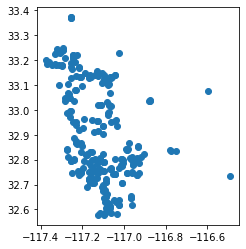

In [29]:
# plotting the data in a geopandas geodataframe if the geometry is set correctly
vac_centers_gdf.plot()


In [30]:
vac_centers_gdf.explore()

### Merging GeoDataFrame with Pandas DataFrame:

#### Census Tracts with Spatial Reference and Population Estimate

In [31]:
tracts2010_pop= tracts2010.merge(total_pop, left_on='NAME10', right_on='TRACT')
tracts2010_pop.head()

tracts2010_pop.rename(columns = {"NAME10": "TRACT"})
tracts2010_pop.merge(total_pop)
tracts2010_pop.head()

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,geometry,TRACT,POPULATION
0,06,073,002702,06073002702,27.02,Census Tract 27.02,G5020,S,1359565.0,0.0,+32.7542098,-117.0728017,1.463433e+07,15777.682783,"POLYGON ((6308294.343 1852984.579, 6308130.254...",27.02,5451
1,06,073,002710,06073002710,27.1,Census Tract 27.10,G5020,S,685713.0,0.0,+32.7439483,-117.0844892,7.381010e+06,15544.558054,"POLYGON ((6304002.695 1852973.667, 6304010.644...",27.1,3803
2,06,073,002707,06073002707,27.07,Census Tract 27.07,G5020,S,383554.0,0.0,+32.7529867,-117.0895143,4.128567e+06,8560.488698,"POLYGON ((6304013.852 1853520.093, 6303977.264...",27.07,5081
3,06,073,002705,06073002705,27.05,Census Tract 27.05,G5020,S,1227304.0,0.0,+32.7338692,-117.0835759,1.321079e+07,17525.076416,"POLYGON ((6304893.130 1844943.083, 6304889.261...",27.05,3840
4,06,073,002202,06073002202,22.02,Census Tract 22.02,G5020,S,486884.0,0.0,+32.7523973,-117.1051018,5.240834e+06,9241.377400,"POLYGON ((6297970.617 1853629.634, 6297886.377...",22.02,5454


### Dissolve:

#### Dissolving San Diego County Census Tracts 
Dissolve the individual census tract boundaries into the whole San Diego county

<AxesSubplot:>

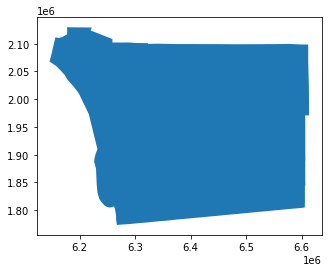

In [32]:
county_boundary_gdf = tracts2010.dissolve(by='COUNTYFP10')

# plotting the data in a geopandas geodataframe if the geometry is set correctly
county_boundary_gdf.plot()

### Making Maps:

Plot the locations of the vaccine centers located within the county on a map showing the county's administrative boundaries.

In [33]:
# to check the crs of a geodataframe, we can read the crs property of the Geodataframe
print(f'Projection (Vaccination Centers) is {vac_centers_gdf.crs}')

vac_centers_gdf.crs # here is a more detailed projection information

Projection (Vaccination Centers) is epsg:4326


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [34]:
print(f'Projection (Municipal Boundaries) is {county_boundary_gdf.crs}')
county_boundary_gdf.crs # here is a more detailed projection information

Projection (Municipal Boundaries) is epsg:2230


<Derived Projected CRS: EPSG:2230>
Name: NAD83 / California zone 6 (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - California - counties Imperial; Orange; Riverside; San Diego.
- bounds: (-118.15, 32.53, -114.42, 34.08)
Coordinate Operation:
- name: SPCS83 California zone 6 (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Reproject one of the above geo dataframes to match the other 

In [35]:
vac_centers_gdf_2230= vac_centers_gdf.to_crs(2230)

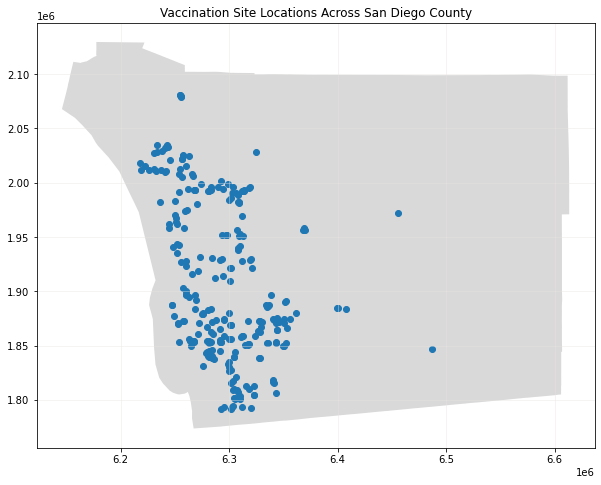

In [36]:
# plot the reprojected vaccination centers on top of san diego county boundry

ax = county_boundary_gdf.plot(color='#d9d9d9', figsize=(10,10))
vac_centers_gdf_2230.plot(ax=ax)
plt.title('Vaccination Site Locations Across San Diego County')
plt.grid(color='#e6e5e3', alpha=0.5)
plt.show()

#### Kinds of Vaccination Centers across SD County
Vaccination Centers may be operated privately, publicly, or a partnership between private/public firms. 

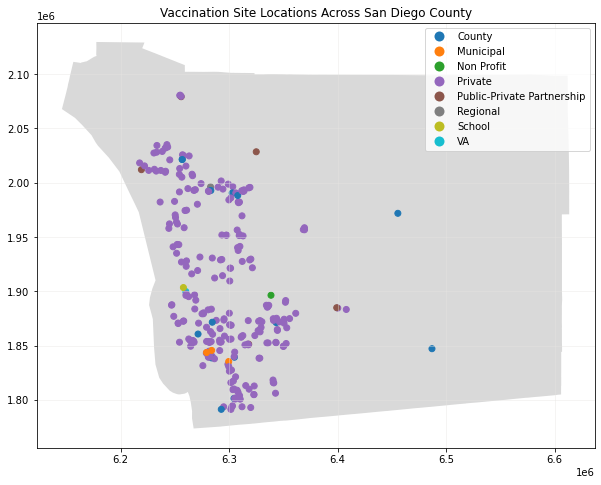

In [37]:
ax = county_boundary_gdf.plot(color='#d9d9d9', figsize=(10,10))
vac_centers_gdf_2230.plot(column='agencytype', ax=ax, legend=True )
plt.title('Vaccination Site Locations Across San Diego County')
plt.grid(color='#e6e5e3', alpha=0.5)
plt.show()

#### Census Tract Population Vs. Vaccination Center Location
Are vaccination centers' location associated with the population of census tracts? Will there be more vaccination centers if the census tract has a larger population?

In [38]:
tracts2010_pop

,STATEFP10,COUNTYFP10,TRACTCE10,GEOID10,NAME10,NAMELSAD10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,Shape_STAr,Shape_STLe,geometry,TRACT,POPULATION
0,06,073,002702,06073002702,27.02,Census Tract 27.02,G5020,S,1359565.0,0.0,+32.7542098,-117.0728017,1.463433e+07,15777.682783,"POLYGON ((6308294.343 1852984.579, 6308130.254...",27.02,5451
1,06,073,002710,06073002710,27.1,Census Tract 27.10,G5020,S,685713.0,0.0,+32.7439483,-117.0844892,7.381010e+06,15544.558054,"POLYGON ((6304002.695 1852973.667, 6304010.644...",27.1,3803
2,06,073,002707,06073002707,27.07,Census Tract 27.07,G5020,S,383554.0,0.0,+32.7529867,-117.0895143,4.128567e+06,8560.488698,"POLYGON ((6304013.852 1853520.093, 6303977.264...",27.07,5081
3,06,073,002705,06073002705,27.05,Census Tract 27.05,G5020,S,1227304.0,0.0,+32.7338692,-117.0835759,1.321079e+07,17525.076416,"POLYGON ((6304893.130 1844943.083, 6304889.261...",27.05,3840
4,06,073,002202,06073002202,22.02,Census Tract 22.02,G5020,S,486884.0,0.0,+32.7523973,-117.1051018,5.240834e+06,9241.377400,"POLYGON ((6297970.617 1853629.634, 6297886.377...",22.02,5454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,06,073,022100,06073022100,221.0,Census Tract 221,G5020,S,18159342.0,509453.0,+33.1242620,-117.2924294,2.009327e+08,68691.939482,"POLYGON ((6250520.299 1991971.647, 6250543.049...",221.0,9630
623,06,073,022000,06073022000,220.0,Census Tract 220,G5020,S,778159.0,0.0,+32.6798189,-117.0871662,8.376307e+06,17466.687741,"POLYGON ((6305274.108 1826342.128, 6305322.962...",220.0,4176
624,06,073,021800,06073021800,218.0,Census Tract 218,G5020,S,1412944.0,29217.0,+32.6865810,-117.1850758,1.552377e+07,25102.306261,"POLYGON ((6272996.861 1831919.949, 6273116.314...",218.0,2001
625,06,073,021600,06073021600,216.0,Census Tract 216,G5020,S,3047192.0,12197070.0,+32.6572021,-117.1561371,1.640944e+08,71975.912832,"POLYGON ((6285569.544 1812547.202, 6285522.587...",216.0,3537


In [ ]:
m = folium.Map(location=[33.0200,-116.85], zoom_start=9, control_scale=True)


newmap = tracts2010_pop.explore(m=m, column="POPULATION", cmap ="OrRd", tiles = "Stamen Watercolor", scheme="FisherJenks",
                 popup=True,k=8, highlight=True, tooltip={"POPULATION","TRACTCE10"},
                 width="70%", legend=True)

# Convert points to GeoJSON
points_gjson = folium.features.GeoJson(vac_centers_gdf, name="Vaccination Center")
points_gjson.add_to(m)

# Display the map
m